**Aisle Pairing Analysis**

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# from google.colab import files
# uploaded = files.upload()

Saving instacart.csv to instacart (1).csv


In [8]:
df = pd.read_csv("instacart.csv")
df.head(5)

,order_id,product_name,department,aisle
0,1,Bulgarian Yogurt,dairy eggs,yogurt
1,98,Whole Milk Greek Blended Vanilla Bean Yogurt,dairy eggs,yogurt
2,13746,Whole Milk Greek Blended Vanilla Bean Yogurt,dairy eggs,yogurt
3,170,Plain Non-Fat Greek Yogurt,dairy eggs,yogurt
4,20900,Plain Non-Fat Greek Yogurt,dairy eggs,yogurt


In [12]:
# Group the DataFrame by order_id

order_df = df.groupby('order_id').agg({'aisle': 'nunique', 'product_name': 'count'}).reset_index()
order_df.columns = ['order_id', 'unique_aisles', 'products']

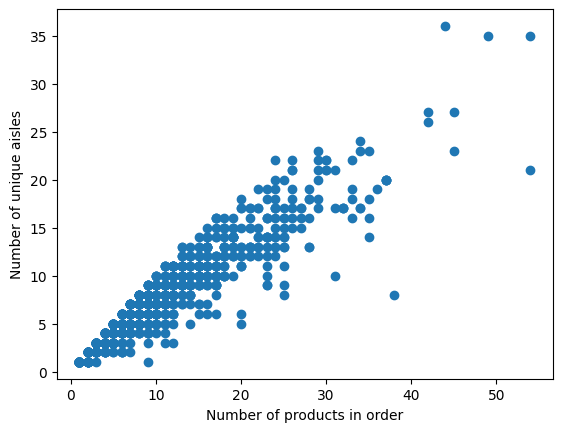

In [14]:
# Unique Aisle vs Product Recommendations

plt.scatter(x = order_df['products'], y = order_df['unique_aisles'])

plt.xlabel('Number of products in order')
plt.ylabel('Number of unique aisles')

plt.show()

In [15]:
from itertools import combinations

def product_pairs(df):
  
    products = list(df['product_name'])
    aisles = list(df['aisle'])
    pairs = list(combinations(zip(products, aisles), 2))
    same_aisle = [x[0][1] == x[1][1] for x in pairs]

    return list(zip(pairs, same_aisle))

In [16]:
pair_df = pd.DataFrame(product_pairs(df), columns=['pair', 'same_aisle'])

In [17]:
counts = pair_df.groupby(['pair', 'same_aisle']).size().reset_index(name='count')

In [18]:
common = counts.sort_values('count', ascending=False).drop_duplicates(subset='pair').reset_index(drop=True)

In [19]:
common

,pair,same_aisle,count
0,"((Organic Strawberries, fresh fruits), (Banana...",True,13056
1,"((Bag of Organic Bananas, fresh fruits), (Bana...",True,13056
2,"((Bag of Organic Bananas, fresh fruits), (Orga...",True,10404
3,"((Banana, fresh fruits), (Organic Baby Spinach...",False,9344
4,"((Banana, fresh fruits), (Large Lemon, fresh f...",True,8832
...,...,...,...
11452152,"((Milk Whole, milk), (Organic Sweet Vanilla Be...",False,1
11452153,"((Milk Whole, milk), (Organic Sweet Potato Spi...",False,1
11452154,"((Milk Whole, milk), (Organic Sweet Peas, froz...",False,1
11452155,"((Milk Whole, milk), (Organic Sweet Onion, fre...",False,1


In [20]:
filtered = common[common['count'] >= 100]
filtered

,pair,same_aisle,count
0,"((Organic Strawberries, fresh fruits), (Banana...",True,13056
1,"((Bag of Organic Bananas, fresh fruits), (Bana...",True,13056
2,"((Bag of Organic Bananas, fresh fruits), (Orga...",True,10404
3,"((Banana, fresh fruits), (Organic Baby Spinach...",False,9344
4,"((Banana, fresh fruits), (Large Lemon, fresh f...",True,8832
...,...,...,...
46980,"((Michigan Organic Kale, fresh vegetables), (S...",False,100
46981,"((Organic Italian Parsley Bunch, fresh herbs),...",False,100
46982,"((Organic Italian Parsley Bunch, fresh herbs),...",False,100
46983,"((Broccoli Crown, fresh vegetables), (Classic ...",False,100


In [21]:
same = filtered['same_aisle'].mean()
same

0.06544641906991593